<a href="https://colab.research.google.com/github/Yussufkadir/Health-cost-calculator-with-Linear-Regression/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-02-22 10:36:14--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0.002s  

2025-02-22 10:36:14 (31.4 MB/s) - ‘insurance.csv.2’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
dataset['sex'] = dataset['sex'].map({'male': 0, 'female': 1})
dataset['smoker'] = dataset['smoker'].map({'yes':1, 'no':0})
region_dummies = pd.get_dummies(dataset['region'], prefix='region')
dataset = pd.concat([dataset, region_dummies], axis=1)
dataset.drop('region', axis=1, inplace=True)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.9,0,1,16884.92,False,False,False,True
1,18,0,33.8,1,0,1725.55,False,False,True,False
2,28,0,33.0,3,0,4449.46,False,False,True,False
3,33,0,22.7,0,0,21984.47,False,True,False,False
4,32,0,28.9,0,0,3866.86,False,True,False,False


In [ ]:
test_data = dataset['expenses']
dataset.drop('expenses', axis=1, inplace=True)
train_range = int(0.8*len(dataset))
train_dataset = dataset[:train_range]
train_labels = test_data[:train_range]
test_dataset = dataset[train_range:]
test_labels = test_data[train_range:]

In [ ]:
norm_layer = layers.Normalization(axis=-1)
norm_layer.adapt(np.array(train_dataset))

model = keras.Sequential([
    norm_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
history = model.fit(train_dataset, train_labels, epochs=10, batch_size=32, validation_split=0.2)

print("Training history:", history.history)
model.summary()

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 12554.4336 - mae: 12554.4336 - mse: 295518400.0000 - val_loss: 12491.6143 - val_mae: 12491.6143 - val_mse: 292850880.0000
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11791.9434 - mae: 11791.9434 - mse: 287717760.0000 - val_loss: 9597.8203 - val_mae: 9597.8203 - val_mse: 213288208.0000
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8286.0479 - mae: 8286.0479 - mse: 179640256.0000 - val_loss: 6497.5176 - val_mae: 6497.5176 - val_mse: 118339456.0000
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5873.7817 - mae: 5873.7817 - mse: 111825336.0000 - val_loss: 4385.7217 - val_mae: 4385.7217 - val_mse: 72302384.0000
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4034.7563 - mae: 4034.7563 - mse: 70967120.0000 - val_loss: 3590.9673 - val_mae: 3590.9673 - val_mse: 53464016.0000
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3404.7463 - mae: 3404.7463 - mse: 51774700.0000 - val_loss

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_8 (Normalization)      │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,136 (8.35 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 1,412 (5.52 KB)

9/9 - 0s - 6ms/step - loss: 3251.3474 - mae: 3251.3474 - mse: 40173372.0000
Testing set Mean Abs Error: 3251.35 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


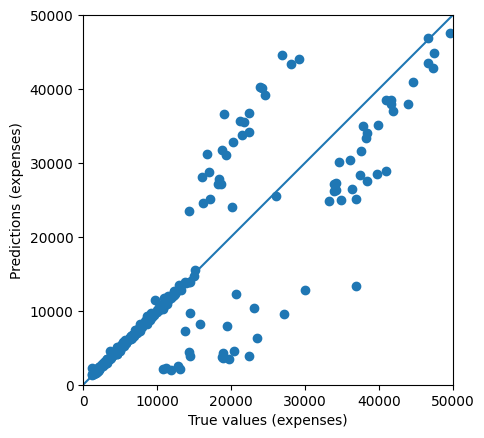

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
